Use wrf-python to read wrf output, thing to note here is I use **disable_xarray()** to only extract the value

In [ ]:
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, disable_xarray, enable_xarray

ncfile = Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d01_2024-09-04_00:05:00")

# Disable xarray completely
disable_xarray()
p_no_meta = getvar(ncfile, "P")
print (p_no_meta)
enable_xarray()

# Disable by using the meta parameter
#p_no_meta = getvar(ncfile, "P", meta=False)
#print (type(p_no_meta))

<font color=red>This method provide way to read multiple outputs files one time</font>

In [ ]:
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES

# Creating a simple test list with three timesteps
wrflist = [Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d03_2024-09-04_23:57:00"),
           Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d03_2024-09-04_23:58:03")]

# Extract the 'P' variable for all times
p_cat = getvar(wrflist, "P", timeidx=ALL_TIMES, method="cat")

print(p_cat)

In [ ]:
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES

# Creating a simple test list with three timesteps
wrflist = [Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d03_2024-09-04_23:57:00"),
           Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d03_2024-09-04_23:58:03")]

# Extract the 'P' variable for all times
p_cat = getvar(wrflist, "P", timeidx=ALL_TIMES, method="join")

print(p_cat)

# Interpolate to horizontal pressure level

In [ ]:
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, interplevel

ncfile = Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d03_2024-09-04_23:57:00")

# Extract the Geopotential Height and Pressure (hPa) fields
z = getvar(ncfile, "z")
p = getvar(ncfile, "pressure")

# Compute the 500 MB Geopotential Height
ht_500mb = interplevel(z, p, 500.)

print(ht_500mb)

<font fontsize=25>以上是最常用的，除此之外[wrf-python](https://wrf-python.readthedocs.io/en/latest/basic_usage.html)还介绍了cross-section函数以及OpenMP的用法，暂时用不到所以记在这里</font>

# Plot example

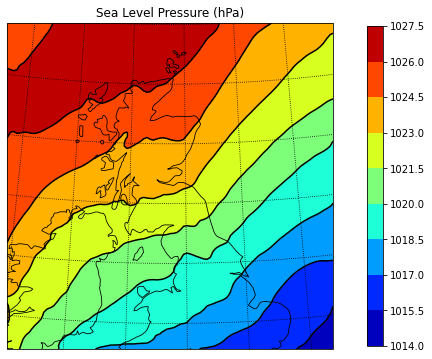

In [24]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
ncfile = Dataset("/home/sun/Build_WRF/WRF-4.4-ARW/run/wrfout_d01_2024-09-04_23:57:00")

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
#states = NaturalEarthFeature(category="cultural", scale="50m",
#                             facecolor="none",
#                             name="admin_1_states_provinces_shp")
#ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()